In [3]:
import pennylane as qml
from pennylane import numpy as pnp
import numpy as np

In [7]:
num_qubits = 4
num_layers = 1
params_shape = qml.StronglyEntanglingLayers.shape(n_layers=num_layers, n_wires=num_qubits)
dev = qml.device("default.qubit", wires=num_qubits, shots=None)

@qml.qnode(dev)
def circuit(params):
    params = pnp.tensor(params.reshape(params_shape), requires_grad=True)
    qml.StronglyEntanglingLayers(weights=params, wires=np.arange(num_qubits), imprimitive=qml.CNOT)
    

In [14]:
params = np.random.random(size=np.prod(params_shape))
qml.draw(circuit)(params)

'0: ──RZ(0.86)──RY(0.93)──RZ(0.81)─╭●───────╭X─┤  \n1: ──RZ(0.62)──RY(0.65)──RZ(0.82)─╰X─╭●────│──┤  \n2: ──RZ(0.39)──RY(0.86)──RZ(0.63)────╰X─╭●─│──┤  \n3: ──RZ(0.32)──RY(0.15)──RZ(0.42)───────╰X─╰●─┤  '

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

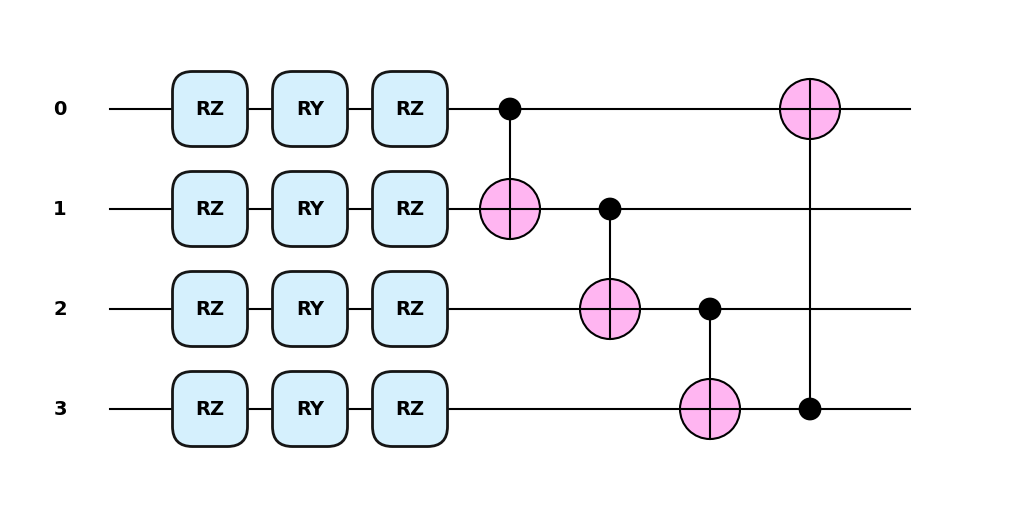

In [15]:
qml.draw_mpl(circuit, style="pennylane")(params)

In [13]:
num_qubits = 4
num_layers = 1
params_shape = qml.StronglyEntanglingLayers.shape(n_layers=num_layers, n_wires=num_qubits)
dev = qml.device("default.qubit", wires=num_qubits, shots=None)

@qml.qnode(dev)
def circuit(params):
    params = pnp.tensor(params.reshape(params_shape), requires_grad=True)

    for layer in range(num_layers):
        for wire in range(num_qubits):
            phi, theta, omega = params[layer, wire]
            qml.RZ(phi, wires=wire)
            qml.RY(theta, wires=wire)
            qml.RZ(omega, wires=wire)

        for i in range(num_qubits):
            qml.CNOT(wires=[i, (i + 1) % num_qubits])